<a href="https://colab.research.google.com/github/Minc97/Praca-magisterska-backend/blob/master/Emotions_recogniction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization, ZeroPadding2D, Convolution2D, MaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from zipfile import ZipFile



In [2]:
!gdown 'https://drive.google.com/uc?id=17J5FbFqnkdzrTbMuEMrRUiJrvHB4BUZv' -O image_dataset.zip

!mkdir -p image_dataset

with ZipFile('image_dataset.zip', 'r') as zip:
    zip.extractall('image_dataset')

!rm image_dataset.zip

Downloading...
From: https://drive.google.com/uc?id=17J5FbFqnkdzrTbMuEMrRUiJrvHB4BUZv
To: /content/image_dataset.zip
68.3MB [00:00, 95.6MB/s]


In [3]:
train_dir = "image_dataset/train" 
test_dir = "image_dataset/test"  
img_size = 48
num_classes = 7

In [4]:
train_datagen = ImageDataGenerator( #rotation_range = 120,
                                         width_shift_range = 0.2,
                                         height_shift_range = 0.2,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         zoom_range = 0.2,
                                         validation_split = 0.2
                                        )

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 128,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 128,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [70]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())

model.add(Conv2D(128, (4,4), padding='same', activation='relu' ))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (4,4), padding='same', activation='relu' ))
model.add(BatchNormalization())

model.add(Conv2D(128, (4,4), padding='same', activation='relu' ))
model.add(BatchNormalization())

model.add(Conv2D(128, (4,4), padding='same', activation='relu' ))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(256, (4,4), padding='same', activation='relu' ))
model.add(BatchNormalization())

model.add(Conv2D(256, (4,4), padding='same', activation='relu' ))
model.add(BatchNormalization())

model.add(Conv2D(256, (4,4), padding='same', activation='relu' ))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(512, (4,4), padding='same', activation='relu' ))
model.add(BatchNormalization())

model.add(Conv2D(512, (4,4), padding='same', activation='relu' ))
model.add(BatchNormalization())

model.add(Conv2D(512, (4,4), padding='same', activation='relu' ))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten()) 
model.add(Dense(400,activation = 'relu'))
model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [71]:
epochs = 60
batch_size = 64

In [72]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_59 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_60 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 48, 48, 128)       131200    
_________________________________________________________________
batch_normalization_61 (Batc (None, 48, 48, 128)       512       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 24, 24, 128)     

In [73]:
history = model.fit(x = train_generator,epochs = epochs, validation_data = validation_generator)

Epoch 1/60
180/180 [==============================] - 115s 622ms/step - loss: 2.3982 - accuracy: 0.2137 - val_loss: 1.8917 - val_accuracy: 0.1732
Epoch 2/60
180/180 [==============================] - 112s 620ms/step - loss: 1.7869 - accuracy: 0.2604 - val_loss: 1.8764 - val_accuracy: 0.2591
Epoch 3/60
180/180 [==============================] - 111s 619ms/step - loss: 1.7286 - accuracy: 0.2961 - val_loss: 1.7507 - val_accuracy: 0.3031
Epoch 4/60
180/180 [==============================] - 112s 624ms/step - loss: 1.6664 - accuracy: 0.3295 - val_loss: 1.5299 - val_accuracy: 0.4022
Epoch 5/60
180/180 [==============================] - 111s 619ms/step - loss: 1.6001 - accuracy: 0.3660 - val_loss: 1.5032 - val_accuracy: 0.4176
Epoch 6/60
180/180 [==============================] - 111s 619ms/step - loss: 1.5335 - accuracy: 0.3966 - val_loss: 1.4194 - val_accuracy: 0.4581
Epoch 7/60
180/180 [==============================] - 112s 622ms/step - loss: 1.4610 - accuracy: 0.4263 - val_loss: 1.3718 -

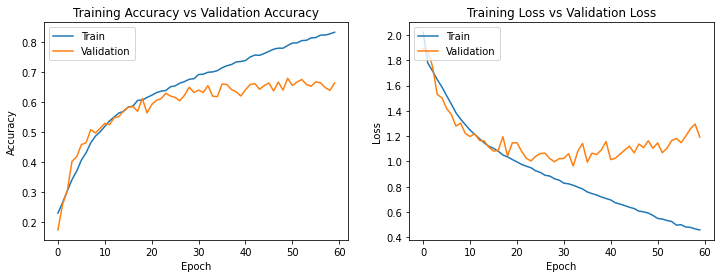

In [74]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [76]:
model.save('model_optimal.h5')

(48, 48)


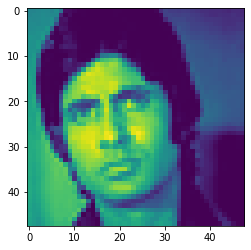

In [87]:
img = image.load_img("image_dataset/test/angry/im87.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

In [88]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [89]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

[0.0005629772, 3.9485425e-20, 7.822509e-12, 7.880792e-20, 8.053738e-06, 0.9994287, 2.5323283e-07]


In [90]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Sad


In [91]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

12/12 [==============================] - 2s 177ms/step - loss: 1.1916 - accuracy: 0.6641
final train accuracy = 83.17 , validation accuracy = 66.41


In [93]:
model.save_weights('model_weights.h5')